In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.table import Table as tbl
from astropy.table import vstack
%matplotlib inline

In [3]:
def lightcurve(source, periods):        #source--the raw lightcurve, period--freq1_freq from cesium.featurize
    nOid = np.unique(source['oid'])
    
    fig = plt.figure(figsize = (20, 15))   #Not 100% necessary
    
    if (len(nOid) > 1): #If true, then we uploaded a positional query
        for i in range(len(nOid)):
            want = np.where(source['oid'] == nOid[i])
            
            if (source['fid'][want][0] == 1):
                cmap = plt.cm.Greens_r
                filt = 'green filter'
            elif (source['fid'][want][0] == 2):
                cmap = plt.cm.Reds_r
                filt = 'Red filter'
                
            ax = plt.subplot2grid((4*len(nOid), 3), (3*i,0), colspan = 1)
            ax.scatter(source[want]['obsmjd'], source[want]['mag_autocorr'], c = cmap(source[want]['magerr_auto']))
            ax.errorbar(source[want]['obsmjd'], source[want]['mag_autocorr'], yerr = source[want]['magerr_auto'], fmt = 'none', c = cmap(source[want]['magerr_auto']), markersize = 5, label = 'Overall source curve')
            ax.set_ylabel('Magnitude')
            ax.set_xlabel('Time')
            ax.set_title('Total lightcurve of {0}'.format(nOid[i]))

            ax1 = plt.subplot2grid((4*len(nOid), 3), ((3*i + 1),0), rowspan = 2, colspan = 2)
            ax1.scatter((source[want]['obsmjd']/periods[i])%1, source[want]['mag_autocorr'], c = cmap(source[want]['magerr_auto']))
            ax1.errorbar((source[want]['obsmjd']/periods[i])%1, source[want]['mag_autocorr'], yerr = source[want]['magerr_auto'], fmt = 'none', c = cmap(source[want]['magerr_auto']), markersize = 3, label = filt)
            ax1.set_ylabel('Magnitude')
            ax1.set_xlabel('Phase')
            ax1.set_title('Folded lightcurve of {0} in {1}'.format(nOid[i], filt))
            
    elif (len(nOid) == 1):  ##A query by oid
        if (source['fid'][0] == 1):
            cmap = plt.cm.G
            filt = 'green filter'
        elif (source['fid'][0] == 2):
            cmap = matplotlib.cm.get_cmap('Reds_r')
            filt = 'Red filter'
        
        ax = plt.subplot2grid((4,3), (0,0), colspan = 1, rowspan = 1)
        ax.scatter(source['obsmjd'], source['mag_autocorr'], cmap = cmap, c = source['magerr_auto'])
        ax.errorbar(source['obsmjd'], source['mag_autocorr'], yerr = source['magerr_auto'], fmt = 'none', c = cmap(source['magerr_auto']), markersize = 5, label = 'Overall source curve')
        ax.set_ylabel('Magnitude')
        ax.set_xlabel('Time')
        ax.set_title('Total lightcurve of {0}'.format(nOid[0]))
        
        ax1 = plt.subplot2grid((4,3), (1,0), rowspan = 2, colspan = 2)
        ax1.scatter((source['obsmjd']/periods[0])%1, source['mag_autocorr'], cmap = cmap, c = source['magerr_auto'])
        ax1.errorbar((source['obsmjd']/periods[0])%1, source['mag_autocorr'], yerr = source['magerr_auto'], fmt = 'none', c = cmap(source['magerr_auto']), markersize = 3, label = filt)
        ax1.set_ylabel('Magnitude')
        ax1.set_xlabel('Phase')
        ax1.set_title('Folded lightcurve of {0} in {1}'.format(nOid[0], filt))
            
    plt.tight_layout()

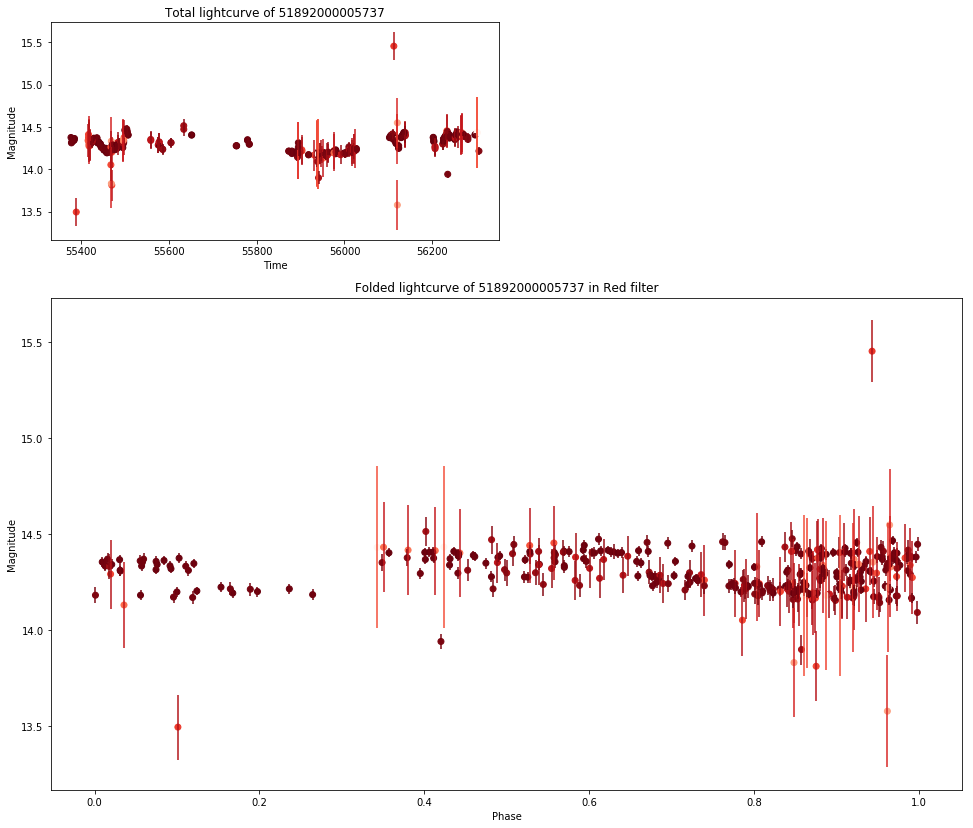

In [4]:
test = tbl.read('scripts/ptf_query/byOid/curves_oid___51892000005737.tbl', format = 'ipac')
mask = np.where(test['mag_autocorr'] > 0)
period = [1.00156182622]

lightcurve(test[mask], period)

Plot without error bars. Darker colors represent smaller errors. Not sure if error bars would be a helpful addition here or not. Currently, struggling to figure out a way to change the errorbars according to their size. This plot isnt phase folded but so far none of these are variable.

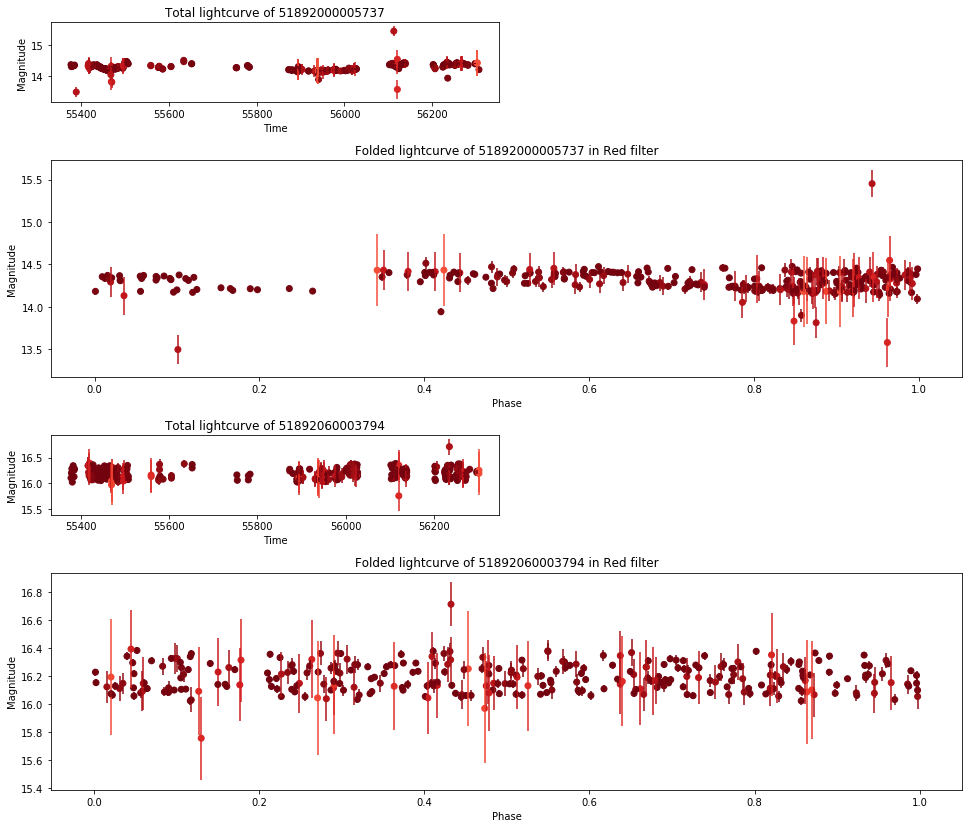

In [5]:
test2 = tbl.read('scripts/ptf_query/byOid/curves_oid___51892060003794.tbl', format = 'ipac')
test3 = vstack([test, test2])
mask3 = np.where(test3['mag_autocorr'] > 0)
periods = [1.00156182622, 0.0566304253118]
lightcurve(test3[mask3], periods)